# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf['reviewColumn']=hotelDf['reviewColumn'].astype('str')

In [3]:
hotelDf.shape#3857 data

(3857, 5)

# Q1. Sentiment Analysis and Aggregation

In [0]:
reviews = hotelDf['reviewColumn'].values

In [0]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [6]:
reviewDF = evalSentences(reviews, to_df = True, columns = ['reviewCol','vader_score'])

100%|██████████| 3857/3857 [00:03<00:00, 980.64it/s]


In [7]:
reviewDF.head()

,reviewCol,vader_score
0,"""This is not a fancy hotel, but it is very com...",0.9764
1,"""The carpets are very dirty, they need to be s...",-0.9249
2,"""marijuana smell in lobby as soon as you walk ...",0.4826
3,"""Very nice office people and friendly. We did...",0.7425
4,"""The room was very clean, could have used four...",0.7996


In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=100):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [10]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader_score,room,hotel,staff,clean,stay,breakfast,great,good,nice,rooms,would,friendly,stayed,comfortable,area,night,pool,one,desk,well,helpful,front,place,get,restaurant,location,time,bed,also,back,inn,could,huron,hot,like,...,crossing,children,spent,worst,overnight,must,rates,welcome,others,menu,dining,special,shop,bedding,hallways,u002f,hallway,cereal,including,party,greeted,choose,real,fun,either,thanks,usual,screen,areas,served,pet,charged,point,city,member,reason,stopped,distance,minute,beyond
0,Super 8 by Wyndham Marysville/Port Huron Area,3,negative,"""This is not a fancy hotel, but it is very com...",0.9764,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Super 8 by Wyndham Marysville/Port Huron Area,2,negative,"""The carpets are very dirty, they need to be s...",-0.9249,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super 8 by Wyndham Marysville/Port Huron Area,1,negative,"""marijuana smell in lobby as soon as you walk ...",0.4826,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super 8 by Wyndham Marysville/Port Huron Area,5,positive,"""Very nice office people and friendly. We did...",0.7425,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super 8 by Wyndham Marysville/Port Huron Area,4,positive,"""The room was very clean, could have used four...",0.7996,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
topk[:50]

[('room', 3706),
 ('hotel', 3339),
 ('staff', 2224),
 ('clean', 2202),
 ('stay', 2146),
 ('breakfast', 1816),
 ('great', 1719),
 ('good', 1466),
 ('nice', 1432),
 ('rooms', 1362),
 ('would', 1325),
 ('friendly', 1275),
 ('stayed', 1134),
 ('comfortable', 981),
 ('area', 926),
 ('night', 895),
 ('pool', 875),
 ('one', 872),
 ('desk', 858),
 ('well', 781),
 ('helpful', 754),
 ('front', 746),
 ('place', 729),
 ('get', 689),
 ('restaurant', 683),
 ('location', 672),
 ('time', 657),
 ('bed', 641),
 ('also', 638),
 ('back', 637),
 ('inn', 632),
 ('could', 622),
 ('huron', 596),
 ('hot', 549),
 ('like', 547),
 ('port', 546),
 ('service', 511),
 ('water', 490),
 ('check', 486),
 ('always', 485),
 ('beds', 469),
 ('close', 461),
 ('sarnia', 455),
 ('next', 450),
 ('even', 440),
 ('really', 437),
 ('excellent', 432),
 ('nthe', 430),
 ('best', 430),
 ('recommend', 422)]

In [13]:
hotelNames = finaldf['hotelName'].unique()
hotelNames#31 hotels

array(['Super 8 by Wyndham Marysville/Port Huron Area', 'Clair Inn',
       'Sunbridge Hotel and Conference Centre Sarnia',
       'Quality Inn Sarnia', 'Best Western Plus Guildwood Inn',
       'Hampton Inn by Hilton Sarnia/Point Edward', 'Comfort Inn',
       'Holiday Inn Express Sarnia - Point Edward',
       'Forest Golf Club &amp; Inn', 'Willies Inn Motel',
       'The Gables Inn', 'Versatile Inn Hotel',
       'Lambton College Residence', 'Chipican Motel',
       'The Harbourfront Inn and Suites', 'Palace Inn Motel',
       'East Court Motel', 'Twin Lakes Retreat Bed and Breakfast',
       'Fauld&#39;s Motel Sarnia', 'The Insignia Hotel',
       'Howard Johnson Inn Sarnia', 'Super 8 by Wyndham Sarnia on',
       'Fairfield Inn by Marriott Port Huron',
       'Baymont by Wyndham Port Huron',
       'DoubleTree by Hilton Hotel Port Huron',
       'Best Western Port Huron Blue Water Bridge',
       'Days Inn by Wyndham Port Huron', 'Hampton Inn Port Huron',
       'Holiday Inn Expre

(a) Compute average Vader sentiment and average ground truth rating per hotel.

In [0]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avg'+measure]
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avg'+measure,ascending=0)
    return hotelRatingDfGt

In [0]:
hotelRatingDfGt = getHotelRank(finaldf)

In [16]:
hotelRatingDfGt.head()

,hotelName,avgratingScore
19,The Insignia Hotel,5.000000
30,Inn on Water Street - Waterfront Boutique Hote...,4.692308
5,Hampton Inn by Hilton Sarnia/Point Edward,4.672727
24,DoubleTree by Hilton Hotel Port Huron,4.526316
7,Holiday Inn Express Sarnia - Point Edward,4.500000


In [0]:
hotelRatingDfVd = getHotelRank(finaldf, measure='vader_score')

In [18]:
hotelRatingDfVd.head()

,hotelName,avgvader_score
19,The Insignia Hotel,0.983240
17,Twin Lakes Retreat Bed and Breakfast,0.963233
30,Inn on Water Street - Waterfront Boutique Hote...,0.909462
12,Lambton College Residence,0.891400
3,Quality Inn Sarnia,0.854208


(b) Rank hotels by

1.   Average Ground Truth Sentiment
2.   Average Vader Compound Sentiment Score


Show both top-5 and bottom-5 for both ranking methods. Do they agree or are there interesting differences?

In [0]:
rating_rank = hotelRatingDfGt.sort_values(by= 'avgratingScore', ascending= False)

In [21]:
rating_rank.head()

,hotelName,avgratingScore
19,The Insignia Hotel,5.000000
30,Inn on Water Street - Waterfront Boutique Hote...,4.692308
5,Hampton Inn by Hilton Sarnia/Point Edward,4.672727
24,DoubleTree by Hilton Hotel Port Huron,4.526316
7,Holiday Inn Express Sarnia - Point Edward,4.500000


In [22]:
rating_rank.tail()

,hotelName,avgratingScore
8,Forest Golf Club &amp; Inn,2.666667
26,Days Inn by Wyndham Port Huron,2.222222
1,Clair Inn,2.100000
11,Versatile Inn Hotel,2.000000
13,Chipican Motel,1.863636


In [0]:
vader_rank = hotelRatingDfVd.sort_values(by= 'avgvader_score', ascending=False)

In [24]:
vader_rank.head()

,hotelName,avgvader_score
19,The Insignia Hotel,0.983240
17,Twin Lakes Retreat Bed and Breakfast,0.963233
30,Inn on Water Street - Waterfront Boutique Hote...,0.909462
12,Lambton College Residence,0.891400
3,Quality Inn Sarnia,0.854208


In [25]:
vader_rank.tail()

,hotelName,avgvader_score
8,Forest Golf Club &amp; Inn,0.385315
9,Willies Inn Motel,0.366920
13,Chipican Motel,0.235755
26,Days Inn by Wyndham Port Huron,0.135346
1,Clair Inn,0.062870


For top5 ranking, only one hotel ranked on the first is same, there are two hotels listed in both ranking methods.


For bottom5 ranking, 4 hotels are listed in both two ranking methods. Although their order is different.

# Q2. Frequency Analysis

(a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [26]:
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader_score']]
itemAnalysisDf

,reviewCol,groundTruth,vader_score
0,"""This is not a fancy hotel, but it is very com...",negative,0.9764
1,"""The carpets are very dirty, they need to be s...",negative,-0.9249
2,"""marijuana smell in lobby as soon as you walk ...",negative,0.4826
3,"""Very nice office people and friendly. We did...",positive,0.7425
4,"""The room was very clean, could have used four...",positive,0.7996
...,...,...,...
3852,"""My husband and I spent 2 nights, because we h...",positive,0.9923
3853,"""The walkable location and water view of freig...",positive,0.9551
3854,"""What a great stay! Nice views of freighters g...",positive,0.9579
3855,"""We stayed at the Inn and did the theatre pack...",positive,0.9615


In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    #add new stop words by checking the topk
    stop.add('would')
    stop.add('also')
    stop.add('could')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [28]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')
topkGroundPos

[('clean', 1777),
 ('great', 1574),
 ('breakfast', 1386),
 ('nice', 1181),
 ('good', 1124),
 ('friendly', 1074),
 ('comfortable', 833),
 ('stayed', 831),
 ('area', 712),
 ('helpful', 660),
 ('pool', 653),
 ('well', 619),
 ('restaurant', 571),
 ('location', 547),
 ('huron', 500),
 ('desk', 498),
 ('night', 492),
 ('place', 491),
 ('one', 486),
 ('always', 454),
 ('front', 453),
 ('port', 449),
 ('time', 437),
 ('inn', 420),
 ('get', 414),
 ('excellent', 403),
 ('back', 394),
 ('service', 394),
 ('hot', 394),
 ('close', 376),
 ('bed', 370),
 ('sarnia', 370),
 ('recommend', 367),
 ('best', 356),
 ('river', 352),
 ('water', 345),
 ('beds', 341),
 ('view', 332),
 ('food', 327),
 ('check', 324),
 ('quiet', 317),
 ('definitely', 315),
 ('bridge', 314),
 ('really', 303),
 ('everything', 299),
 ('like', 299),
 ('next', 291),
 ('right', 287),
 ('nthe', 265),
 ('free', 264)]

In [29]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')
topkGroundNeg

[('breakfast', 430),
 ('clean', 425),
 ('night', 403),
 ('one', 386),
 ('desk', 360),
 ('good', 342),
 ('stayed', 303),
 ('front', 293),
 ('get', 275),
 ('bed', 271),
 ('nice', 251),
 ('like', 248),
 ('back', 243),
 ('place', 238),
 ('bathroom', 222),
 ('door', 222),
 ('pool', 222),
 ('time', 220),
 ('area', 214),
 ('inn', 212),
 ('friendly', 201),
 ('floor', 197),
 ('even', 194),
 ('told', 191),
 ('old', 186),
 ('never', 181),
 ('nthe', 165),
 ('well', 162),
 ('check', 162),
 ('next', 159),
 ('hot', 155),
 ('got', 150),
 ('dirty', 149),
 ('went', 149),
 ('comfortable', 148),
 ('two', 147),
 ('great', 145),
 ('said', 145),
 ('water', 145),
 ('people', 144),
 ('morning', 143),
 ('work', 142),
 ('day', 142),
 ('first', 140),
 ('booked', 137),
 ('price', 137),
 ('another', 135),
 ('really', 134),
 ('need', 133),
 ('motel', 129)]

By looking at the top-50 most frequent non-stopwords in the review collection for both positive and negative reviews, I found that for positive, the top ranking words are definitely make sense to me, like "clean", "great", "nice"...etc. Locale-specific words, for example, "breakfast", "pool" are also ranked highly. These words may indicate the hotel have great facilities and services.

For negative reviews, the results are interesting because the for some words listed in the positve reviews were also listed here. The results do not make sense to me for analyzing negative reviews. I read some full reviews sentance and found out that maybe these "positive words" in negative list, people use the phrase to represent their description, such as 'not clean', 'not nice'.

Thus, word frequence method may not be a good metric.

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [0]:
tagger = PerceptronTagger()

In [0]:
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
pos_tag = tagger.tag

In [0]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [0]:
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
chunker = nltk.RegexpParser(grammar)

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values

    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF, k=50)

In [38]:
topk_phrase

[('front desk', 336),
 ('port huron', 305),
 ('hot tub', 152),
 ('blue water bridg', 100),
 ('hampton inn', 97),
 ('great place', 78),
 ('park lot', 72),
 ('pool area', 71),
 ('front desk staff', 70),
 ('continent breakfast', 63),
 ('free breakfast', 63),
 ('holiday inn', 58),
 ('st clair river', 58),
 ('friendli staff', 57),
 ('next morn', 56),
 ('great locat', 56),
 ('great view', 55),
 ('best western', 54),
 ('hotel staff', 52),
 ('breakfast area', 50),
 ('comfort bed', 50),
 ('clean room', 49),
 ('second floor', 47),
 ('nthe room', 46),
 ('next time', 45),
 ('next day', 42),
 ('first time', 41),
 ('great stay', 40),
 ('great hotel', 40),
 ('day inn', 39),
 ('comfort inn', 39),
 ('breakfast buffet', 38),
 ('nice hotel', 38),
 ('good valu', 38),
 ('hockey tournament', 37),
 ('nice place', 36),
 ('night stay', 36),
 ('hot water', 36),
 ('great experi', 36),
 ('hotel room', 35),
 ('indoor pool', 33),
 ('easi access', 32),
 ('baymont inn', 32),
 ('hockey team', 31),
 ('first floor', 31)

In [39]:
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader_score,front desk,port huron,hot tub,blue water bridg,hampton inn,great place,park lot,pool area,front desk staff,continent breakfast,free breakfast,holiday inn,st clair river,friendli staff,next morn,great locat,great view,best western,hotel staff,breakfast area,comfort bed,clean room,second floor,nthe room,next time,next day,first time,great stay,great hotel,day inn,comfort inn,breakfast buffet,nice hotel,good valu,hockey tournament,nice place,night stay,hot water,great experi,hotel room,indoor pool,easi access,baymont inn,hockey team,first floor,complimentari breakfast,clean staff,qualiti inn,lake huron,cracker barrel
0,Super 8 by Wyndham Marysville/Port Huron Area,3,negative,"""This is not a fancy hotel, but it is very com...",0.9764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Super 8 by Wyndham Marysville/Port Huron Area,2,negative,"""The carpets are very dirty, they need to be s...",-0.9249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super 8 by Wyndham Marysville/Port Huron Area,1,negative,"""marijuana smell in lobby as soon as you walk ...",0.4826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super 8 by Wyndham Marysville/Port Huron Area,5,positive,"""Very nice office people and friendly. We did...",0.7425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super 8 by Wyndham Marysville/Port Huron Area,4,positive,"""The room was very clean, could have used four...",0.7996,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
phraseAnalysisDf = finaldf_phrase[['reviewCol','groundTruth','vader_score']]
phraseAnalysisDf

,reviewCol,groundTruth,vader_score
0,"""This is not a fancy hotel, but it is very com...",negative,0.9764
1,"""The carpets are very dirty, they need to be s...",negative,-0.9249
2,"""marijuana smell in lobby as soon as you walk ...",negative,0.4826
3,"""Very nice office people and friendly. We did...",positive,0.7425
4,"""The room was very clean, could have used four...",positive,0.7996
...,...,...,...
3852,"""My husband and I spent 2 nights, because we h...",positive,0.9923
3853,"""The walkable location and water view of freig...",positive,0.9551
3854,"""What a great stay! Nice views of freighters g...",positive,0.9579
3855,"""We stayed at the Inn and did the theatre pack...",positive,0.9615


In [0]:
def forphrase_getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop= set(stopwords)#set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    #add new stop words by checking the topk
    stop.add('would')
    stop.add('also')
    stop.add('could')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            #print(type(review))
            #Counter.update(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',review))))]))
            counter.update(flatten([word
                  for word 
                  in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                  ]))
    topk = counter.most_common(k)
    return topk

In [42]:
phrasetopkGroundPos = forphrase_getTopK(df=phraseAnalysisDf, k=50, label_value='positive')
phrasetopkGroundPos
#list obj has no attribute 'words'
#cannot use a string pattern on a bytes-like object

[('port huron', 249),
 ('front desk', 194),
 ('hot tub', 113),
 ('blue water bridg', 94),
 ('hampton inn', 80),
 ('great place', 73),
 ('st clair river', 57),
 ('great view', 53),
 ('friendli staff', 49),
 ('front desk staff', 49),
 ('great locat', 49),
 ('best western', 49),
 ('pool area', 46),
 ('free breakfast', 46),
 ('clean room', 44),
 ('comfort bed', 40),
 ('great hotel', 40),
 ('great stay', 39),
 ('continent breakfast', 36),
 ('park lot', 36),
 ('breakfast area', 35),
 ('holiday inn', 35),
 ('next time', 34),
 ('hotel staff', 34),
 ('great experi', 33),
 ('nice hotel', 32),
 ('next morn', 32),
 ('breakfast buffet', 30),
 ('nice place', 29),
 ('good valu', 29),
 ('easi access', 29),
 ('first time', 27),
 ('lake huron', 27),
 ('hockey tournament', 26),
 ('good breakfast', 26),
 ('night stay', 26),
 ('good food', 26),
 ('complimentari breakfast', 26),
 ('cracker barrel', 26),
 ('great valu', 25),
 ('indoor pool', 25),
 ('second floor', 25),
 ('hot breakfast', 25),
 ('baymont inn'

In [43]:
phrasetopkGroundNeg = forphrase_getTopK(df=phraseAnalysisDf, k=50, label_value='negative')
phrasetopkGroundNeg

[('front desk', 142),
 ('port huron', 56),
 ('hot tub', 39),
 ('day inn', 37),
 ('park lot', 36),
 ('continent breakfast', 27),
 ('hot water', 25),
 ('next day', 25),
 ('pool area', 25),
 ('next morn', 24),
 ('holiday inn', 23),
 ('nthe room', 23),
 ('non smoke room', 22),
 ('second floor', 22),
 ('front desk staff', 21),
 ('first floor', 20),
 ('hotel room', 18),
 ('smoke room', 18),
 ('hotel staff', 18),
 ('free breakfast', 17),
 ('comfort inn', 17),
 ('hampton inn', 17),
 ('hockey team', 16),
 ('first night', 16),
 ('breakfast area', 15),
 ('air condition', 15),
 ('good thing', 15),
 ('second night', 14),
 ('desk clerk', 14),
 ('first time', 14),
 ('credit card', 14),
 ('doubl bed', 13),
 ('previou guest', 12),
 ('saturday night', 11),
 ('next time', 11),
 ('hockey tournament', 11),
 ('first room', 11),
 ('breakfast room', 11),
 ('main floor', 10),
 ('second room', 10),
 ('bed bug', 10),
 ('night stay', 10),
 ('golf cours', 10),
 ('ice machin', 10),
 ('comfort bed', 10),
 ('long tim

The majority words for both positive and negative are locale-specific. For positive, like "great locat", "great place".
Negative results: similar to q2(a)results, there are still some positive phrase in nagetive results. I went back to check full review sentance and found out that these positive words may start with words"but","however", and for some cases, people write their expectations for hotel.

# Q3. Mutual Information

(a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment- bearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
def dataFrameTransformation(hotelDf, reviewDF, k=100):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords)
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [51]:
miScoredf = getMI(topk, finaldf)
miScoredf[:50]

,Word,MI Score
6,great,0.040797
176,dirty,0.033320
2,staff,0.024164
95,old,0.023716
94,told,0.020464
3,clean,0.018116
11,friendly,0.017176
0,room,0.016925
463,worst,0.016653
20,helpful,0.016179


Words with high MI score usually with strong sentiment expression, seems like negative results take a bigger portion. And these words are not locale-specific.

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF, k=500)

In [0]:
miScoredfphrase = getMI(topk_phrase, finaldf_phrase)

In [55]:
miScoredfphrase[:50]

,Word,MI Score
29,day inn,0.007930
75,non smoke room,0.005706
3,blue water bridg,0.004069
12,st clair river,0.003721
28,great hotel,0.003406
215,second room,0.003323
164,previou guest,0.003160
86,smoke room,0.003140
5,great place,0.003067
16,great view,0.002722


Locale-specific words dominated the phrase MI score results, most of them are still negative, those facilities may be complained by people.

# Q4. Pointwise Mutual Information

(a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py+0.0001))
            else:
                pmi = math.log(pxy/((px*py+0.0001)+0.0001))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/((px*py+0.0001)+0.0001))
    else:
        pmi = math.log(pxy/((px*py+0.0001)+0.0001))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [59]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 500/500 [00:16<00:00, 29.52it/s]


In [60]:
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
395,cookies,0.285723
171,freighters,0.284795
209,highly,0.283624
62,river,0.273573
147,beautiful,0.268775
367,views,0.263396
391,pleased,0.262604
106,wonderful,0.258706
90,enjoyed,0.255552
197,amazing,0.255219


In [61]:
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
176,dirty,1.184931
463,worst,1.171586
491,charged,1.141193
379,carpet,1.058424
383,sheets,1.032027
343,smelled,1.021891
285,toilet,1.013367
265,smoking,1.011955
237,smell,0.998666
412,smoke,0.994201


The top-50 words according to PMI for both positive and negative results, we can see that in positive result, people leave reviews are like: beautiful, fantastic, wonderful, amazing.etc. Those are strong indicators that people gives positive reviews. And also, in positive results, there are so many locale-specific words.

For negative results, "worst, dirty, charged, carpet,smell" These words are most likely got people complained about.

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [62]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████| 500/500 [00:14<00:00, 35.11it/s]


In [63]:
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
28,great hotel,0.299984
12,st clair river,0.289431
81,great servic,0.276704
88,beauti view,0.276704
89,great food,0.274285
27,great stay,0.271946
95,good stay,0.271618
16,great view,0.266788
108,freighter restaur,0.265371
124,short drive,0.257513


In [64]:
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
29,day inn,1.126214
75,non smoke room,1.105796
215,second room,1.033964
164,previou guest,1.005279
86,smoke room,0.953026
379,extra charg,0.898889
141,first room,0.856786
229,handicap room,0.847619
218,bed bug,0.837630
97,credit card,0.831131


PMI for noun phrase results are much more clear, in positive results, most phrase are start with "great/good",in negative results, most of them are locale-specifice words, and these words often towards negative reviews.

(c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

In [0]:
topsingle = finaldf[finaldf['hotelName']=='The Insignia Hotel']
bottomsingle = finaldf[finaldf['hotelName']=='Clair Inn']

In [66]:
pmiposlist_top, pmineglist_top, pmidf_top = pmiForAllCal(topsingle)
pmiposlist_bot, pmineglist_bot, pmidf_bot = pmiForAllCal(bottomsingle)

100%|██████████| 500/500 [00:06<00:00, 74.66it/s]


In [67]:
pmiposlist_top.sort_values('pmi', ascending=0).head(50)

,word,pmi
0,room,-0.000200
1,hotel,-0.000200
2,staff,-0.000250
11,friendly,-0.000333
34,like,-0.000333
21,front,-0.000333
38,check,-0.000333
42,sarnia,-0.000333
58,everything,-0.000333
106,wonderful,-0.000333


In [70]:
pmineglist_top.sort_values('pmi', ascending=0).head(50)

,word,pmi
0,room,-0.693147
329,indoor,-0.693147
342,michigan,-0.693147
341,expect,-0.693147
340,suite,-0.693147
339,something,-0.693147
338,selection,-0.693147
337,main,-0.693147
336,course,-0.693147
335,short,-0.693147


In [69]:
pmiposlist_bot.sort_values('pmi', ascending=0).head(50)

,word,pmi
273,decent,1.599488
128,overall,1.599488
46,excellent,1.599488
25,location,1.599488
49,recommend,1.599488
50,food,1.599488
54,day,1.599488
300,dated,1.599488
466,rates,1.599488
96,easy,1.599488


In [71]:
pmineglist_bot.sort_values('pmi', ascending=0).head(50)

,word,pmi
31,could,0.222519
30,inn,0.222519
34,like,0.222519
51,bathroom,0.222519
125,days,0.222519
332,non,0.222519
265,smoking,0.222519
15,night,0.222311
415,window,0.222311
1,hotel,0.222311


As we can see, for top hotel, pmi for both positive and negative are all negative scores. Negative PMI means they cooccur less frequently than would be expected.  As for bottom hotel, pmi scores are all positive, positive PMI means they co-occur more frequently than would be expected under an independence assumption, thus, maybe it scores high pmi just because people complained about it so often.

# Q5. General Plots

(a) Histogram
(1) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences?

(2) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

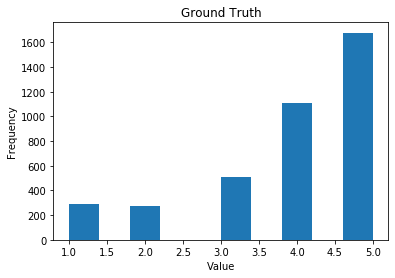

In [73]:
getHistogram('ratingScore', 'Ground Truth')

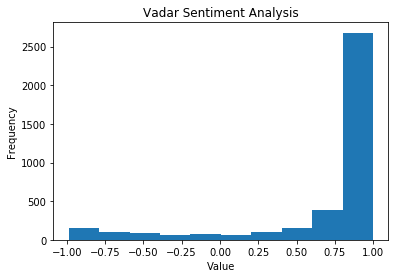

In [74]:
getHistogram('vader_score', 'Vadar Sentiment Analysis')

Vadar diagram has one that obviously higher than the others, while ground truth has two columns more than 1000 frequencies.

In [75]:
hotelreviewcount = Counter(finaldf['hotelName'])
dict(hotelreviewcount)

{'Baymont by Wyndham Port Huron': 520,
 'Best Western Plus Guildwood Inn': 225,
 'Best Western Port Huron Blue Water Bridge': 370,
 'Chipican Motel': 22,
 'Clair Inn': 10,
 'Comfort Inn': 149,
 'Days Inn by Wyndham Port Huron': 225,
 'DoubleTree by Hilton Hotel Port Huron': 570,
 'East Court Motel': 8,
 'Fairfield Inn by Marriott Port Huron': 125,
 'Fauld&#39;s Motel Sarnia': 15,
 'Forest Golf Club &amp; Inn': 39,
 'Hampton Inn Port Huron': 321,
 'Hampton Inn by Hilton Sarnia/Point Edward': 220,
 'Holiday Inn Express &amp; Suites Port Huron': 45,
 'Holiday Inn Express Sarnia - Point Edward': 2,
 'Howard Johnson Inn Sarnia': 70,
 'Inn on Water Street - Waterfront Boutique Hotel &amp; Restaurant': 13,
 'Lambton College Residence': 4,
 'Palace Inn Motel': 5,
 'Quality Inn &amp; Suites': 67,
 'Quality Inn Sarnia': 97,
 'Sunbridge Hotel and Conference Centre Sarnia': 215,
 'Super 8 by Wyndham Marysville/Port Huron Area': 217,
 'Super 8 by Wyndham Sarnia on': 182,
 'The Gables Inn': 18,
 'Th

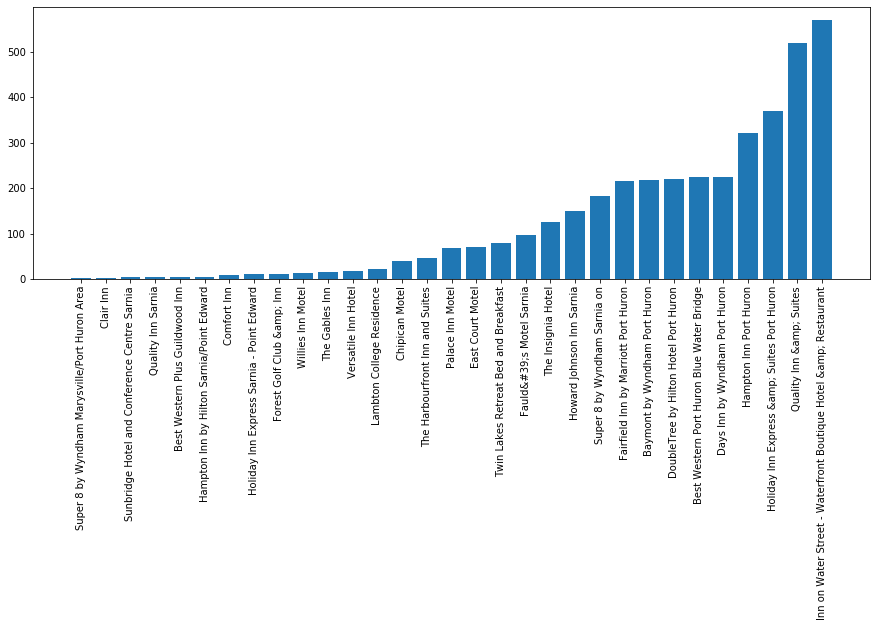

In [77]:
plt.figure(figsize=(15,5))
plt.bar(hotelreviewcount.keys(), sorted(hotelreviewcount.values()))
plt.xticks(list(range(len(hotelreviewcount))),hotelreviewcount.keys(),rotation=90)
plt.show()

As we can see from the plot, for majority hotels are rated below 300 times, there are some hotels rated more than 300 times, which means they are more popular.

(b) Boxplots

(1) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of 5 side-by-side boxplots of these scores.

(2) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

(3) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

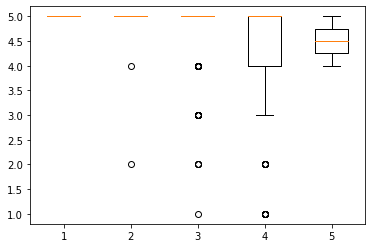

In [78]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgratingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hotel1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
hotel2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hotel3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
hotel4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
hotel5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data_gt = [hotel1, hotel2, hotel3, hotel4, hotel5]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data_gt)
plt.show()

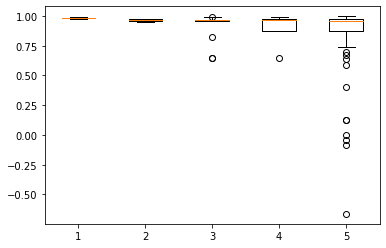

In [79]:
tp5gthotel = hotelRatingDfVd.sort_values('avgvader_score',ascending=0).head(5)
tp5gthotel['hotelName'].values

hotel1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader_score']
hotel2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader_score']
hotel3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader_score']
hotel4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader_score']
hotel5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader_score']

data_vader = [hotel1, hotel2, hotel3, hotel4, hotel5]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data_vader)
plt.show()

In [0]:
def stats(data):
  results=[]
  for hotel in data:
    results.append([hotel.mean(),hotel.var()])
  results_df = pandas.DataFrame(results)
  results_df.columns = ['mean','variance']
  return results_df

In [83]:
gt_stats = stats(data_gt)
gt_stats

,mean,variance
0,5.000000,0.000000
1,4.692308,0.730769
2,4.672727,0.486011
3,4.526316,0.653964
4,4.500000,0.500000


In [84]:
vd_stats = stats(data_vader)
vd_stats

,mean,variance
0,0.983240,0.000020
1,0.963233,0.000221
2,0.909462,0.015426
3,0.891400,0.026489
4,0.854208,0.073399


Boxplots are more informative. Because boxplot shows max,min,1/4 quartile, 3/4 quartile, median. More easily visualize data from boxplot.

(c) Scatterplots and heatmaps

(1) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

(2) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends?

(3) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

Text(0.5, 0, 'Vader Score')

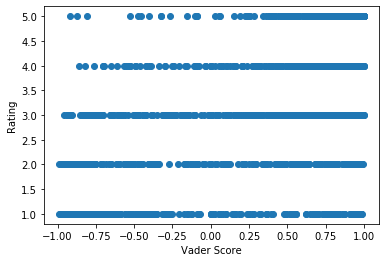

In [85]:
y = finaldf['ratingScore'].values
x = finaldf['vader_score'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

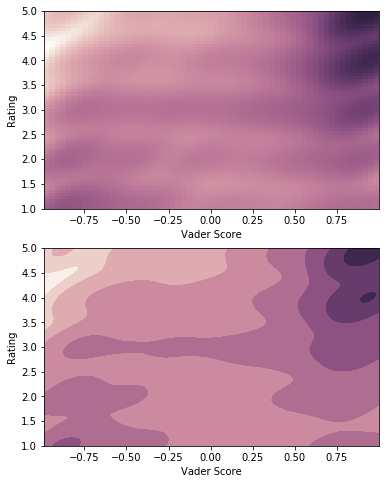

In [87]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

By comparing the scatterplot and heatmaps, heatmap gives more visualization about scatterplot, they correspond very well. The trend here is high star rating usually with high vader rating,and vice via. Average star rating(2-4) may have either high or low vader scores, so in the graph it more looks like a line for average rating. This is because neutral reviews can be positive or negative.

In [0]:
finaldf['lengthofreview'] = finaldf['reviewCol'].str.len()

In [0]:
y = finaldf['ratingScore'].values
x = finaldf['lengthofreview'].values

Text(0.5, 0, 'Vader Score')

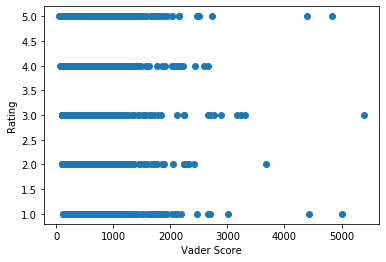

In [90]:
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

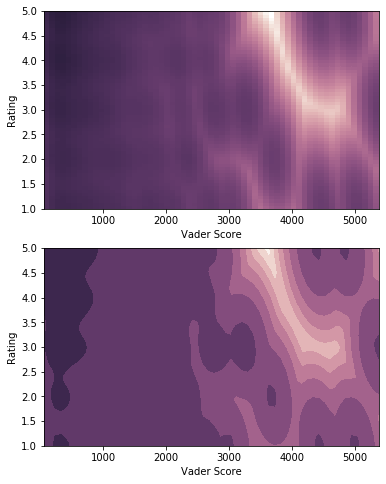

In [92]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

In [0]:
y = finaldf['vader_score'].values
x = finaldf['lengthofreview'].values

Text(0.5, 0, 'Vader Score')

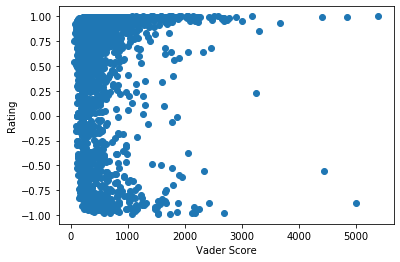

In [94]:
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

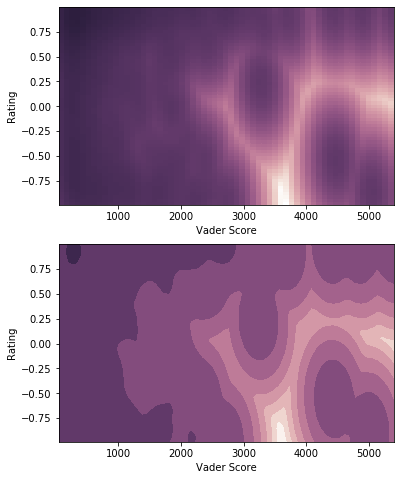

In [96]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

From the scatterplot, we can see there are two extrme conditions that for very positive or very negative review, they have longer review length. For neutral review, the length of them is typically short.

In [0]:
ratinggt = []
vaderscore=[]
for i in hotelreviewcount.keys():
  ratinggt.append(hotelRatingDfGt. loc[hotelRatingDfGt['hotelName']==i]['avgratingScore'].values[0])
  vaderscore.append(hotelRatingDfVd. loc[hotelRatingDfVd['hotelName']==i]['avgvader_score'].values[0])

In [0]:
x=list(hotelreviewcount.values())


Text(0.5, 0, 'number of reviews')

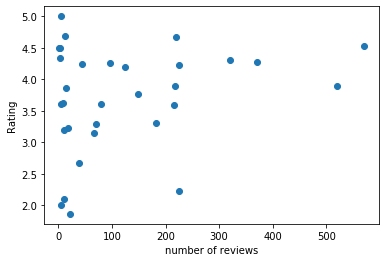

In [99]:
y = ratinggt
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('number of reviews')

Text(0.5, 0, 'number of reviews')

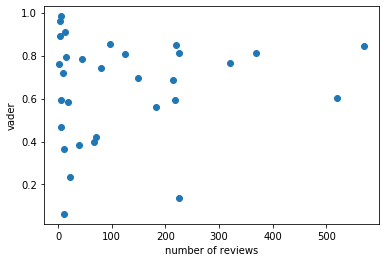

In [100]:
y = vaderscore
plt.plot(x, y,"o")
plt.ylabel('vader')
plt.xlabel('number of reviews')

Hotels that have better rating score(vader or gt), tends to have more reviews.